# Clustering and Analysis of World Happiness Report

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('worldhappinessreport.csv')

In [3]:
data.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [4]:
data.shape

(155, 12)

In [5]:
data.describe()

,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,78.000000,5.354019,5.452326,5.255713,0.984718,1.188898,0.551341,0.408786,0.246883,0.123120,1.850238
std,44.888751,1.131230,1.118542,1.145030,0.420793,0.287263,0.237073,0.149997,0.134780,0.101661,0.500028
min,1.000000,2.693000,2.864884,2.521116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914
25%,39.500000,4.505500,4.608172,4.374955,0.663371,1.042635,0.369866,0.303677,0.154106,0.057271,1.591291
50%,78.000000,5.279000,5.370032,5.193152,1.064578,1.253918,0.606042,0.437454,0.231538,0.089848,1.832910
75%,116.500000,6.101500,6.194600,6.006527,1.318027,1.414316,0.723008,0.516561,0.323762,0.153296,2.144654
max,155.000000,7.537000,7.622030,7.479556,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
Country                          155 non-null object
Happiness.Rank                   155 non-null int64
Happiness.Score                  155 non-null float64
Whisker.high                     155 non-null float64
Whisker.low                      155 non-null float64
Economy..GDP.per.Capita.         155 non-null float64
Family                           155 non-null float64
Health..Life.Expectancy.         155 non-null float64
Freedom                          155 non-null float64
Generosity                       155 non-null float64
Trust..Government.Corruption.    155 non-null float64
Dystopia.Residual                155 non-null float64
dtypes: float64(10), int64(1), object(1)
memory usage: 14.6+ KB


In [18]:
datcor = data.corr()
data.corr()

,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
Happiness.Rank,1.000000,-0.992774,-0.993058,-0.991533,-0.813244,-0.736753,-0.780716,-0.551608,-0.132620,-0.405842,-0.484506
Happiness.Score,-0.992774,1.000000,0.999497,0.999520,0.812469,0.752737,0.781951,0.570137,0.155256,0.429080,0.475355
Whisker.high,-0.993058,0.999497,1.000000,0.998036,0.811868,0.750934,0.776634,0.569907,0.155462,0.426459,0.478824
Whisker.low,-0.991533,0.999520,0.998036,1.000000,0.812267,0.753767,0.786385,0.569808,0.154904,0.431223,0.471505
Economy..GDP.per.Capita.,-0.813244,0.812469,0.811868,0.812267,1.000000,0.688296,0.843077,0.369873,-0.019011,0.350944,0.024226
Family,-0.736753,0.752737,0.750934,0.753767,0.688296,1.000000,0.612080,0.424966,0.051693,0.231841,0.070506
Health..Life.Expectancy.,-0.780716,0.781951,0.776634,0.786385,0.843077,0.612080,1.000000,0.349827,0.063191,0.279752,0.054963
Freedom,-0.551608,0.570137,0.569907,0.569808,0.369873,0.424966,0.349827,1.000000,0.316083,0.499183,0.081926
Generosity,-0.132620,0.155256,0.155462,0.154904,-0.019011,0.051693,0.063191,0.316083,1.000000,0.294159,-0.116627
Trust..Government.Corruption.,-0.405842,0.429080,0.426459,0.431223,0.350944,0.231841,0.279752,0.499183,0.294159,1.000000,-0.022755


In [15]:
data.isnull().sum()
data.isna().sum()

Country                          0
Happiness.Rank                   0
Happiness.Score                  0
Whisker.high                     0
Whisker.low                      0
Economy..GDP.per.Capita.         0
Family                           0
Health..Life.Expectancy.         0
Freedom                          0
Generosity                       0
Trust..Government.Corruption.    0
Dystopia.Residual                0
dtype: int64

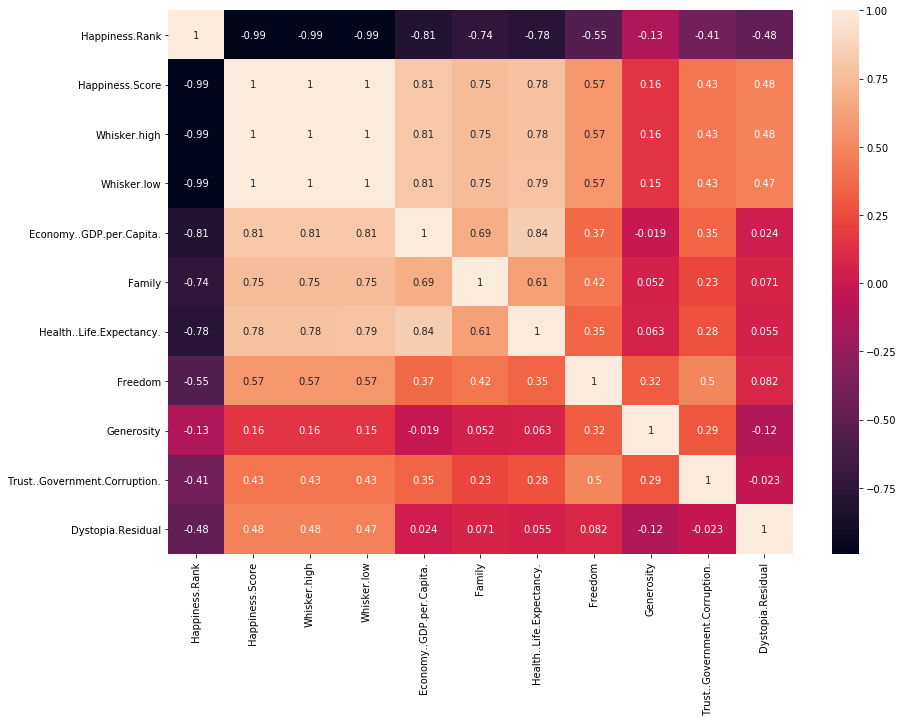

In [24]:
import seaborn as sns

f, ax = plt.subplots(figsize=(14, 10))

sns.heatmap(datcor, annot= True)

<BarContainer object of 10 artists>

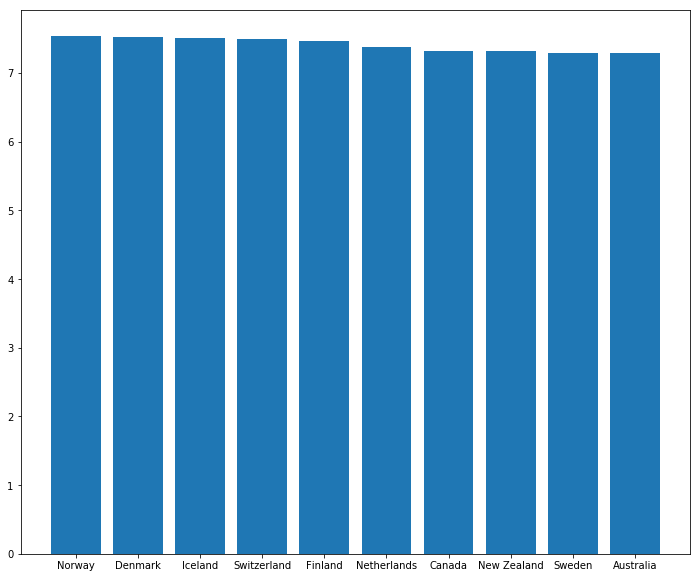

In [30]:
# Lets plot Bar plot for Ahppiness score and countries
fig = plt.figure(figsize=(12,10))
plt.bar(data['Country'][0:10], data['Happiness.Score'][0:10])

In [41]:
def HappyCountry(country,happyscore):
    happycontrylist = []
    happyscorelist = []
    for i,j in zip(country, happyscore):
        if(j>7):
            happycontrylist.append(i)
            happyscorelist.append(j)
    return happycontrylist,happyscorelist
        
    


happ_connt, happ_score = HappyCountry(data['Country'],data['Happiness.Score'])

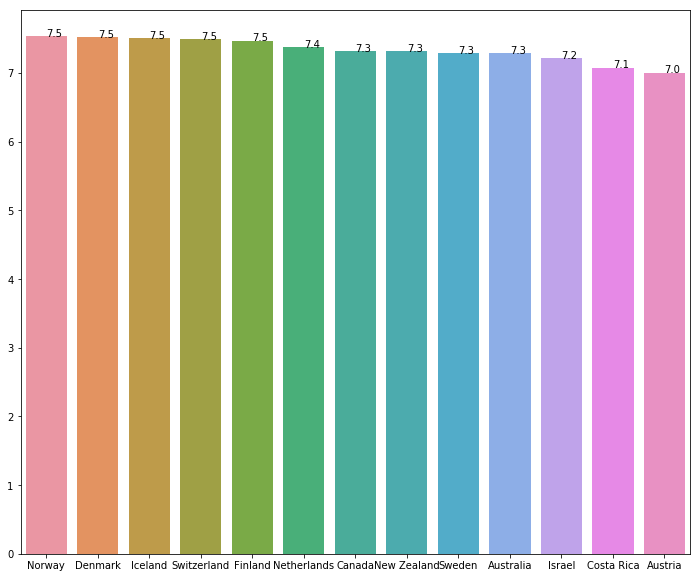

In [54]:
# Worlds most happy Countries
fig = plt.figure(figsize=(12,10))
plots = sns.barplot(happ_connt,happ_score)

for p in plots.patches:
    plots.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   )